In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms as T
from torchvision.datasets import VOCSegmentation, Cityscapes
from PIL import Image

In [2]:
class VOCwithLabels(Dataset):
    VOC_CLASSES = [
        'background', 'aeroplane', 'bicycle', 'bird', 'boat',
        'bottle', 'bus', 'car', 'cat', 'chair',
        'cow', 'diningtable', 'dog', 'horse', 'motorbike',
        'person', 'potted plant', 'sheep', 'sofa', 'train', 'tv/monitor'
    ]
    idx2label = {i: lbl for i, lbl in enumerate(VOC_CLASSES)}
    def __init__(self, root, split, transform=None):
        self.dataset = VOCSegmentation(
            root=root, 
            image_set=split, 
            target_transform=T.Lambda(lambda x: np.asarray(x))
        )
        self.transform = transform
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, idx):
        img, y = self.dataset[idx]
        y = np.unique(y[y<len(VOCwithLabels.VOC_CLASSES)])

        if self.transform is not None:
            img = self.transform(img)
        
        return img, y.tolist()

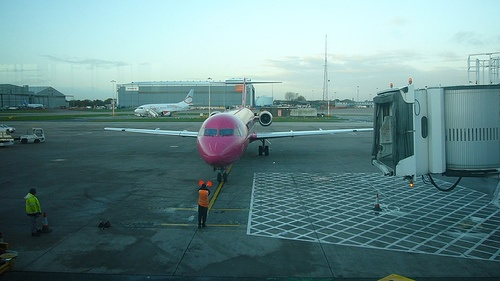

In [3]:
dataset = VOCwithLabels("VOC2012", "train")
img, y = dataset[0]
img

In [4]:
[dataset.idx2label[i] for i in y]

['background', 'aeroplane', 'person']

In [5]:
dataset = Cityscapes(root="cityscapes", split="train", target_type="semantic")

In [6]:
from utils import overlay_mask

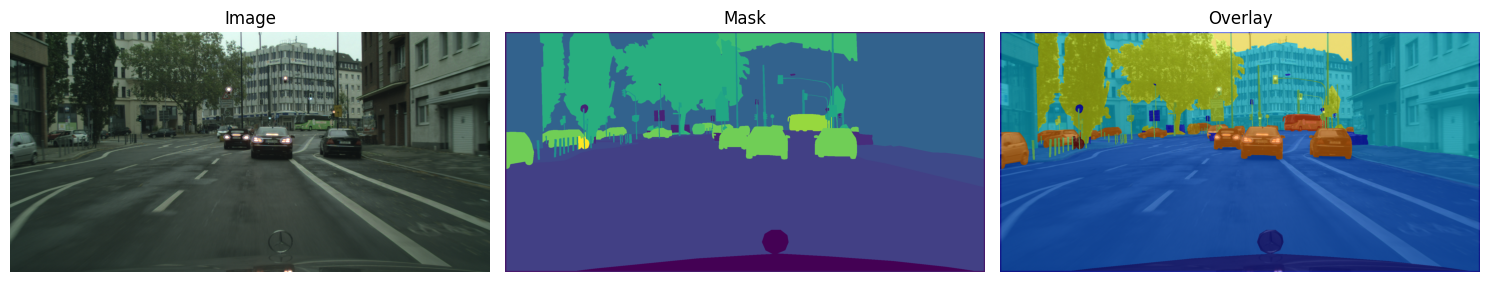

In [8]:
img, mask = dataset[0]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(img)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Mask")
plt.imshow(mask)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Overlay")
plt.imshow(overlay_mask(img, mask))
plt.axis("off")

plt.tight_layout()
plt.show()